Epoch 1/10
160/160 [==============================] - 1s 6ms/step - loss: 0.7670 - accuracy: 0.7579 - val_loss: 0.2759 - val_accuracy: 0.9090
Epoch 2/10
160/160 [==============================] - 1s 6ms/step - loss: 0.1823 - accuracy: 0.9364 - val_loss: 0.1466 - val_accuracy: 0.9470
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.1411 - accuracy: 0.9472 - val_loss: 0.1325 - val_accuracy: 0.9515
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.1289 - accuracy: 0.9515 - val_loss: 0.1217 - val_accuracy: 0.9547
Epoch 5/10
160/160 [==============================] - 1s 5ms/step - loss: 0.1190 - accuracy: 0.9552 - val_loss: 0.1154 - val_accuracy: 0.9594
Epoch 6/10
160/160 [==============================] - 1s 6ms/step - loss: 0.1105 - accuracy: 0.9580 - val_loss: 0.1061 - val_accuracy: 0.9587
Epoch 7/10
160/160 [==============================] - 1s 6ms/step - loss: 0.1032 - accuracy: 0.9607 - val_loss: 0.0996 - val_accuracy: 0.9591
Epoch 

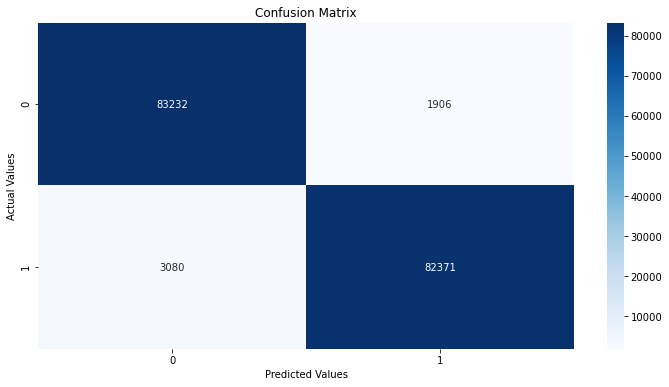

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import Activation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

data = pd.read_csv('creditcard.csv')

count_class_0, count_class_1 = data.Class.value_counts()

df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

y = df_test_over['Class']
X = df_test_over.drop('Class', axis = 1)

cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

oe=OrdinalEncoder()
X[cat_cols]=oe.fit_transform(X[cat_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# dataset2 = pd.read_csv('test_transaction.csv')
# cols=['TransactionID','TransactionDT','TransactionAmt','ProductCD','card1','card2','card3','card4','card5','card6']
# data2=dataset2[cols]
model = Sequential([
      # dense layer 1
    Dense(256, activation='sigmoid'),  
    
    # dense layer 2
    Dense(128, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
results = model.evaluate(X_test,  y_test, verbose = 0)
yhat_classes = model.predict_classes(X_test, verbose=0)
print('test loss, test acc:', results)
print("Precision:", metrics.precision_score(y_test,yhat_classes))
print("Recall:", metrics.recall_score(y_test, yhat_classes))
print("F1-score:", (2*metrics.precision_score(y_test, yhat_classes)*metrics.recall_score(y_test, yhat_classes)) / (metrics.precision_score(y_test, yhat_classes) + metrics.recall_score(y_test, yhat_classes)))
cm = confusion_matrix(y_test, yhat_classes)  
print ("Confusion Matrix : \n", cm)
print("")

cm=confusion_matrix(y_test,yhat_classes)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')